Import all libraries you need.

In this example there are only libraries needed for the example code.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

Read the data.

In this challenge you will use the toy dataset Breast Cancer Wisconsin (Diagnostic) Database.

In the following example, how to load and read  the infos of  this dataset.


In [24]:
breast_dataset=load_breast_cancer()
#let's print the dataset description
print(breast_dataset.DESCR+"\n\n")
#let's print the size of the dataset
print("Size:" +str(breast_dataset.data.shape)+"\n")
#let's print the features names
print("Features:\n"+str(breast_dataset.feature_names)+"\n")
#let's print the class names
print("Classes:\n"+str(breast_dataset.target_names))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Study the features.

As an example, in the following code we use pandas (after a conversion from a  scikit-learn dataset to a pandas dataset) and seaborn libraries to:
- build a scatter matrix to study the covariance between features (in the example, all features are used, but you can plot only the features you need)
- build a heatmap of correlation between features (again of all features, but you can choose what you need) using the Pearson correlation coefficient

<AxesSubplot:>

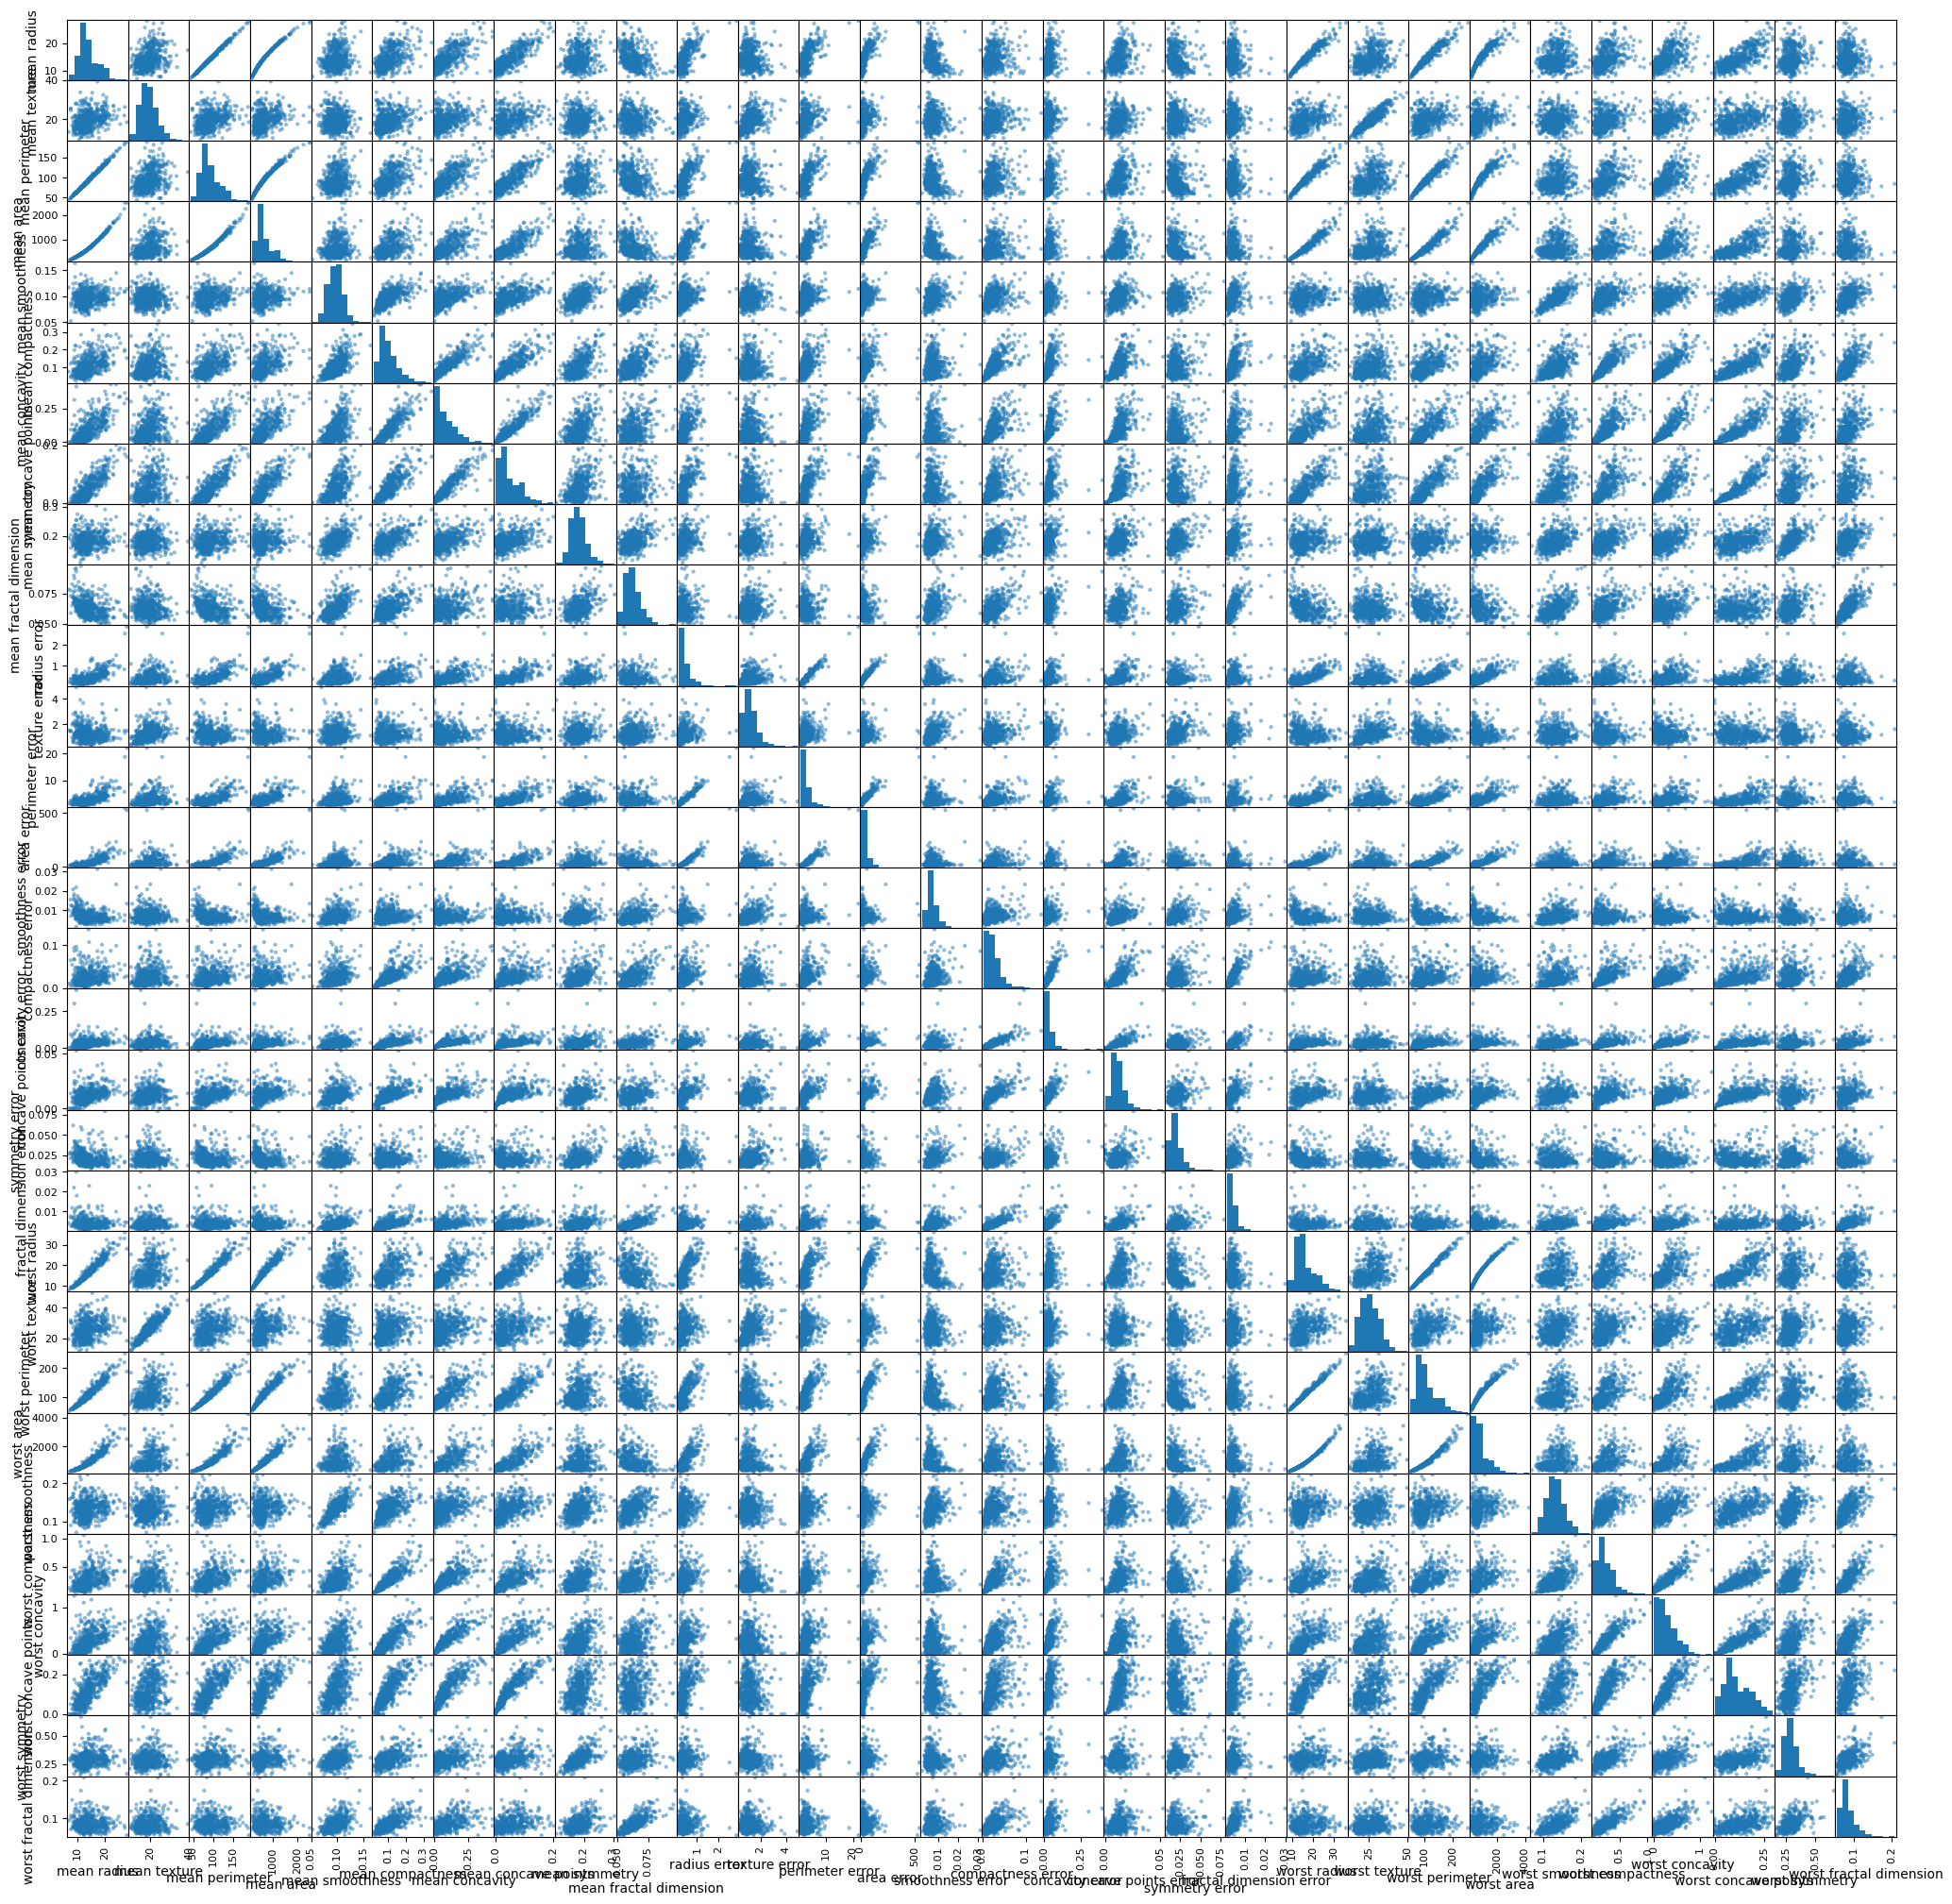

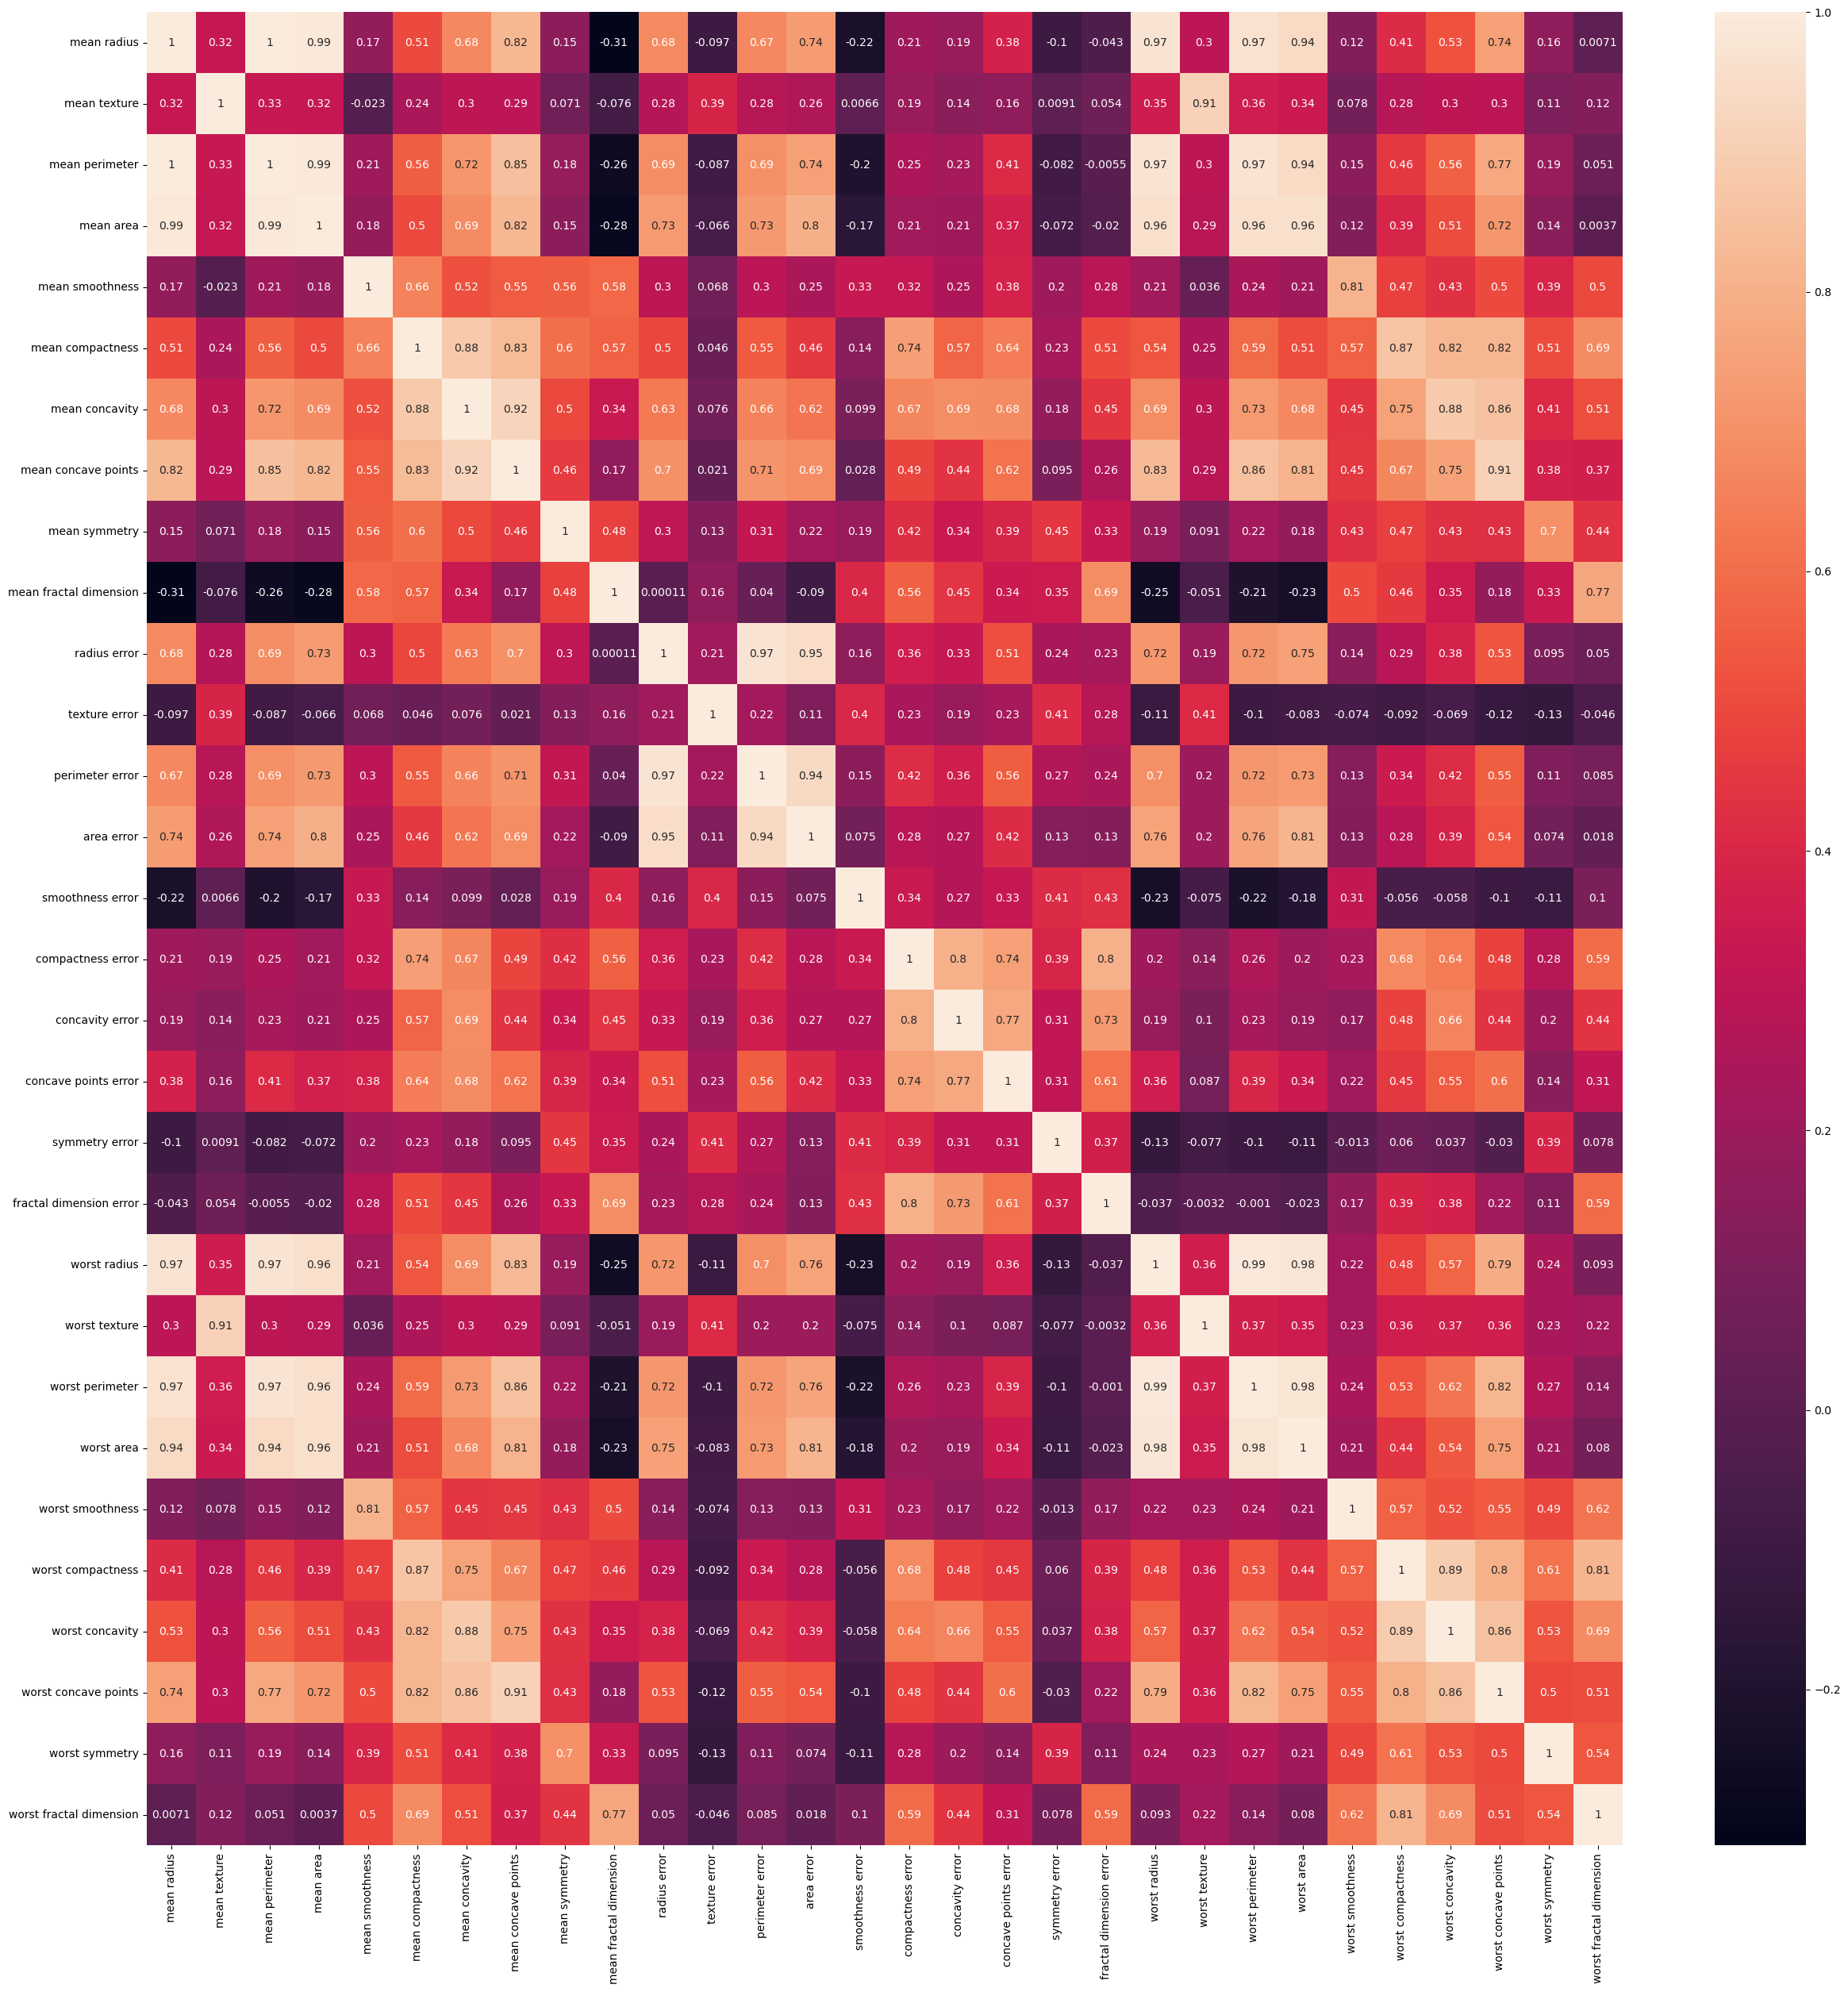

In [25]:
#convert the scikit-learn dataset into pandas dataset
breast_data_pd = pd.DataFrame(breast_dataset.data,columns=breast_dataset.feature_names)
breast_data_pd['target'] = breast_dataset.target
#plot the scatter matrix
pd.plotting.scatter_matrix(breast_data_pd[breast_dataset.feature_names],figsize=(25,25))
#correlation plot
corr = breast_data_pd[breast_dataset.feature_names].corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr,annot=True)


Apply all the feature transformations and/or feature selection and/or dimensionality reduction that you think are necessary to improve the performance.

Follow the Scikit-learn user guide, and in particular: 
- for feature transformations see https://scikit-learn.org/stable/modules/preprocessing.html 
- for dimensionaity reduction see this example on LDA and PCA (we will study more in next lectures) 
  https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
- for feature selection see https://scikit-learn.org/stable/modules/feature_selection.html  

In [45]:
#DO NOT MODIFY THE FOLLOWING SPLIT OF THE DATASET
X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, stratify=breast_dataset.target,random_state=42)

#BE CAREFUL: To find the right transformation only use the training set (variable X_train) 
#Then apply the same transformation to the data in the test set (variable X_test)


#Write here your code to transform, select or reduce features (don't forget to import libraries)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Don't modify this part where we train a 3-NN classifier and evaluate the accuracy on the test set.

In [46]:
#DO NOT MODIFY THE CLASSIFIER AND THE PERFORMANCE EVALUATION
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = knn.predict(X_test)

# Show prediction accuracy
print('\nPrediction accuracy:')
print('{:.2%}\n'.format(accuracy_score(y_test, scores)))



Prediction accuracy:
97.20%



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
